<a href="https://colab.research.google.com/github/Marah-Alasi/ParkinsonsDetection/blob/main/Parkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Veri seti
UCI Machine Learning Repository

In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd

dataset = "/content/drive/MyDrive/PD/pd_speech_features.csv"
data = pd.read_csv(dataset)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import ceil
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras as keras

# Veri Keşfi


In [4]:
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [5]:
data.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [15]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # Filter columns
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = ceil((nCol + nGraphPerRow - 1) / nGraphPerRow)  # Round up to ensure enough rows
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

In [29]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    df = df.dropna(axis='columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    #plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [32]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis='columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [18]:
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 756 rows and 755 columns


In [33]:
plotCorrelationMatrix(data,188)

KeyboardInterrupt: 

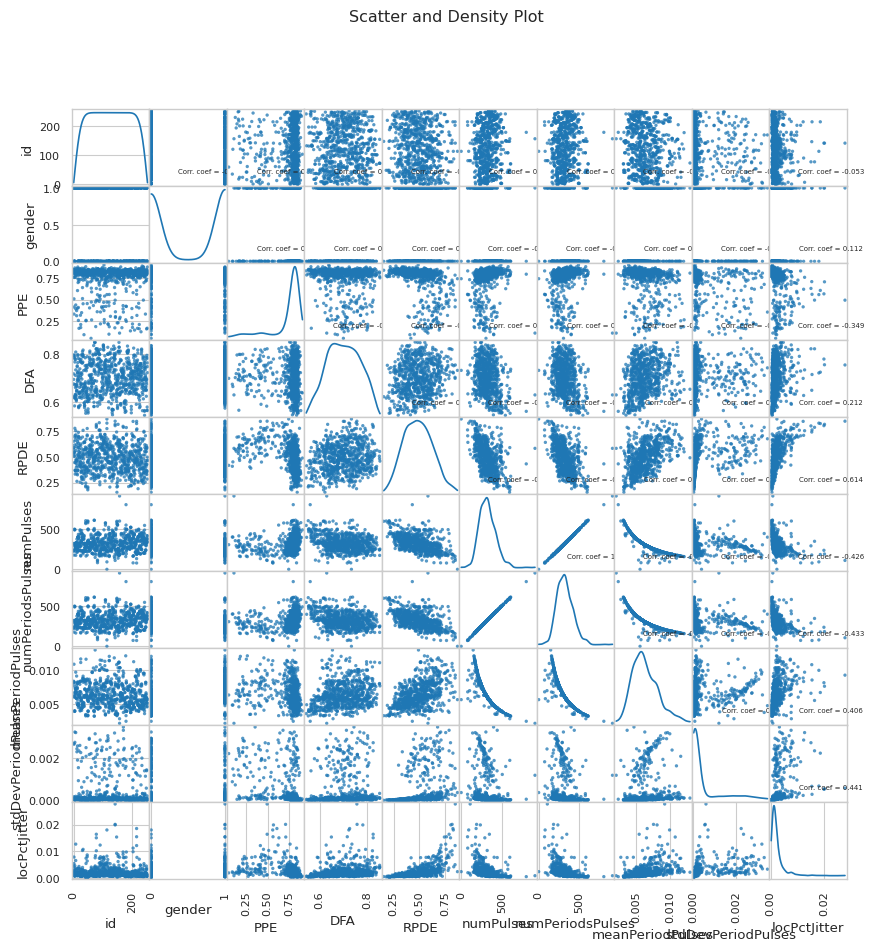

In [36]:
plotScatterMatrix(data, 10, 5)

# Veri ön işleme ve dengesizliği

Veri kümesinde sınıfların örnek sayısı dengeli olmadığı halde modelin doğru tahmin bulunmamasına sebep olmaktadır. Bu nedenle ilk önce dengesizliğin olup olmadığına bakılır.

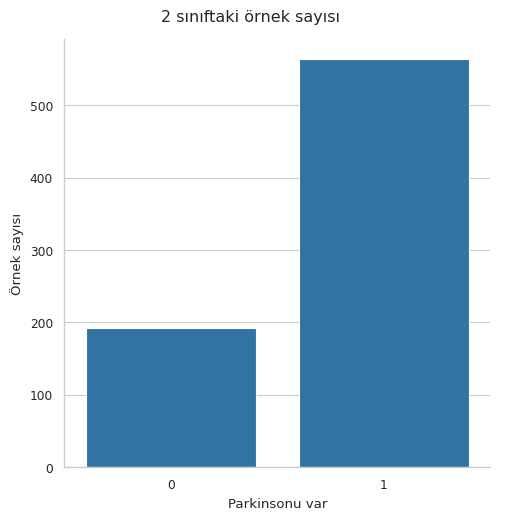

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('paper')
#sns.set_palette('GnBu_d')
a = sns.catplot(x='class', data=data, kind='count')
a.fig.suptitle('2 sınıftaki örnek sayısı', y=1.03)
a.set(ylabel='Örnek sayısı', xlabel='Parkinsonu var')
plt.show()

# Yeniden örnekleme (Resampling)

Resampling, eldeki veri üzerinde yeni örnekler oluşturmak veya veri dağılımını değiştirmek için uygulanan bir istatistiksel tekniktir. Amaç, modeli daha güvenilir hâle getirmek veya dengesiz veri gibi sorunları çözmektir.

Bu verisetine Oversampling uygulanmıştır, az olan sınıftan yeni örnekler üretmek veya mevcut örnekleri çoğaltmak.

In [53]:
X = data.drop('class', axis=1)
y = data['class']

# create oversampled data
oversampler = SMOTE(random_state=1)
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

# check whether both classes have equal number of samples
print(f"Oversampled class zero: {np.sum(y_oversampled==0)}")
print(f"Oversampled class one: {np.sum(y_oversampled==1)}")

# create undersampled data
undersampler = RandomUnderSampler(random_state=1)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

# check whether both classes have equal number of samples
print(f"Undersampled class zero: {np.sum(y_undersampled==0)}")
print(f"Undersampled class one: {np.sum(y_undersampled==1)}")


# train-test split (oversampling)
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_oversampled, y_oversampled, test_size=0.2,shuffle=True, random_state=42)
X_test_oversampled, X_val_oversampled, y_test_oversampled, y_val_oversampled = train_test_split(X_test_oversampled, y_test_oversampled, test_size=0.5, random_state=42)

# standard normalize the data
scaler = preprocessing.StandardScaler().fit(X_train_oversampled)
X_train_oversampled = scaler.transform(X_train_oversampled)
X_test_oversampled = scaler.transform(X_test_oversampled)
X_val_oversampled = scaler.transform(X_val_oversampled)


# train-test split (undersampling)
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled, y_undersampled, test_size=0.2,shuffle=True, random_state=42)
#val split

# standard normalize the data
scaler = preprocessing.StandardScaler().fit(X_train_undersampled)
X_train_undersampled = scaler.transform(X_train_undersampled)
X_test_undersampled = scaler.transform(X_test_undersampled)

Oversampled class zero: 564
Oversampled class one: 564
Undersampled class zero: 192
Undersampled class one: 192


In [7]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=27
)

X = pd.concat([X_train, y_train], axis=1)

parkinson = X.loc[X['class'] == 1]
not_parkinson = X.loc[X['class'] == 0]


fraud_upsampled = resample(not_parkinson,
                          replace=True,
                          n_samples=len(parkinson),
                          random_state=27)


upsampled = pd.concat([parkinson, fraud_upsampled])
y_train_up = upsampled.loc[:,'class']
X_train_up = upsampled.drop(['class'], axis=1)

#min_max_scaler = preprocessing.MinMaxScaler()
#X_train_up = min_max_scaler.fit_transform(X_train_up)
#X_test = min_max_scaler.transform(X_test)
upsampled['class'].value_counts()

,count
class,
1,453
0,453


In [8]:
X_train = X_train_up
y_train = y_train_up

Özellikleri 0 ile 1 arasında olacak şekilde standardization gerçekleştirilir

In [9]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
X_val = min_max_scaler.transform(X_val)

In [10]:
X_train

array([[1.        , 0.91348072, 0.31658795, ..., 0.3418616 , 0.32070282,
        0.04434255],
       [0.        , 0.76418506, 0.64100408, ..., 0.88171484, 0.86721761,
        0.58907748],
       [1.        , 0.88080497, 0.37248496, ..., 0.73726713, 0.70468181,
        0.20621876],
       ...,
       [0.        , 0.86873022, 0.0058873 , ..., 0.35006186, 0.3127969 ,
        0.14105636],
       [1.        , 0.84789511, 0.26337582, ..., 0.08875258, 0.03595286,
        0.0945932 ],
       [0.        , 0.88485863, 0.02817494, ..., 0.01325361, 0.02825575,
        0.00819033]])

In [11]:
!pip install tensorflow

# CNN mimarisi

In [116]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers, models

input_shape = (604, 1)

model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    #layers.Conv1D(64, kernel_size=3, activation='relu'),
    #layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(128, kernel_size=3, activation='relu'),
    layers.GlobalAveragePooling1D(),


    layers.Dense(64, activation='relu'),
    Dropout(0.5),
    layers.Dense(1, activation='sigmoid')   # binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name="AUC")]
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_60 (Conv1D)              │ (None, 602, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_44 (MaxPooling1D) │ (None, 301, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_61 (Conv1D)              │ (None, 299, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_45 (MaxPooling1D) │ (None, 149, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_62 (Conv1D)              │ (None, 147, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_16     │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,361 (153.75 KB)

 Trainable params: 39,361 (153.75 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#from tensorflow.keras.callbacks import EarlyStopping

#early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [117]:
history = model.fit(
    X_train_oversampled,
    y_train_oversampled,
    validation_data=(X_val_oversampled, y_val_oversampled),
    epochs=80,
    batch_size=16,
    shuffle=True
    #callbacks=[early_stopping]
)

Epoch 1/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - AUC: 0.4763 - accuracy: 0.4998 - loss: 0.6967 - val_AUC: 0.6697 - val_accuracy: 0.5929 - val_loss: 0.6863
Epoch 2/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 0.5296 - accuracy: 0.5145 - loss: 0.6918 - val_AUC: 0.7015 - val_accuracy: 0.5929 - val_loss: 0.6541
Epoch 3/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 0.5850 - accuracy: 0.5034 - loss: 0.6820 - val_AUC: 0.6548 - val_accuracy: 0.6106 - val_loss: 0.6563
Epoch 4/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 0.6300 - accuracy: 0.5859 - loss: 0.6633 - val_AUC: 0.6780 - val_accuracy: 0.6106 - val_loss: 0.6386
Epoch 5/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 0.6488 - accuracy: 0.6036 - loss: 0.6565 - val_AUC: 0.6502 - val_accuracy: 0.6195 - val_loss: 0.6468
Epoch 6/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 0.6430 - accuracy: 0.6162 - loss: 0.6518 - val_AUC: 0.6627 - val_accuracy: 0.6195 - val_loss: 0.6372
Epoch 7/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 40m

Eğitim ve doğrulama hatası

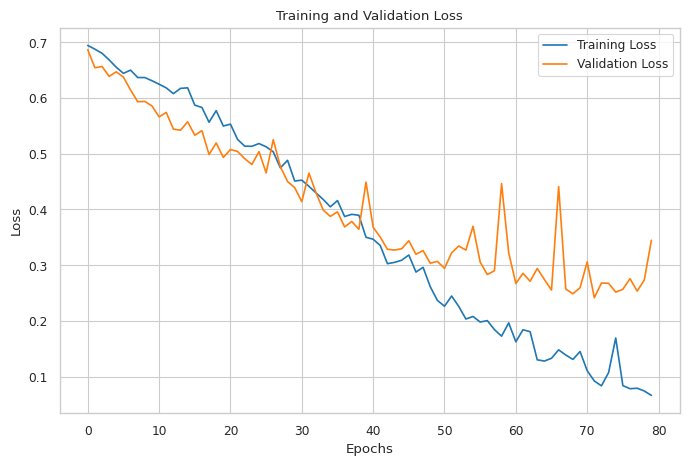

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

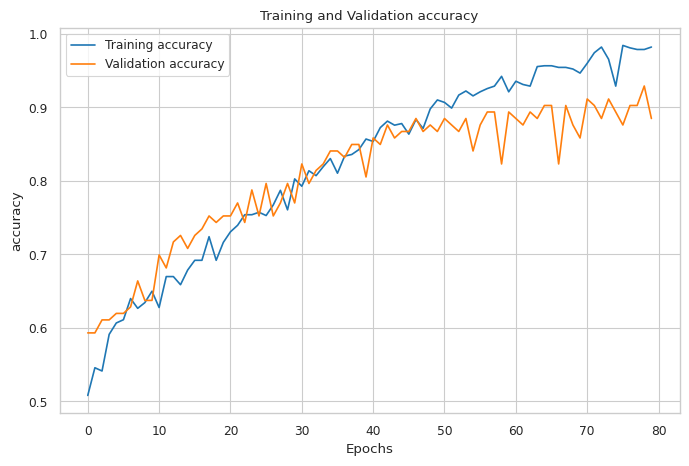

In [119]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [120]:
y_pred_prob = model.predict(X_test_oversampled)
y_pred = (y_pred_prob > 0.5).astype("int32")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

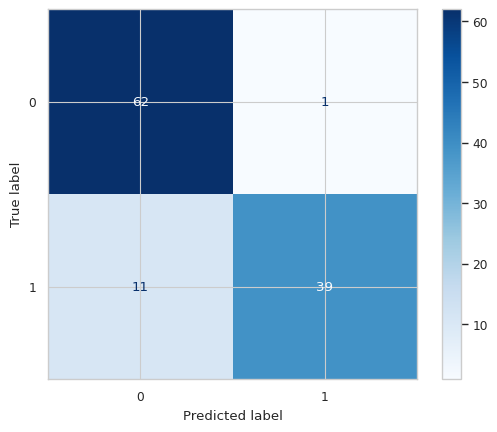

In [121]:
cm = confusion_matrix(y_test_oversampled, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test_oversampled, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        63
           1       0.97      0.78      0.87        50

    accuracy                           0.89       113
   macro avg       0.91      0.88      0.89       113
weighted avg       0.90      0.89      0.89       113



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step 


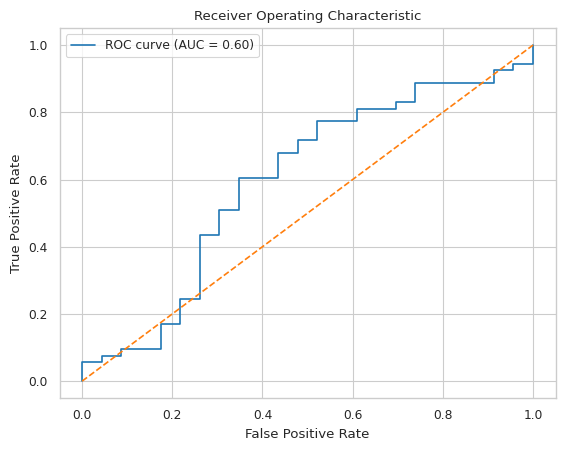

In [73]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probability scores from model
y_pred_prob = model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')  # chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()